In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.colors as mcolors
from dateutil import parser

# Import Scikit-learn for Machine Learning libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE

### Input the data

In [7]:
df = pd.read_csv("Question 1.csv")

In [8]:
df.head()

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


DATA CLEANING

In [9]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 41)


### Uniqueness

In [10]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Unnamed: 0: 207 distinct values
ID: 207 distinct values
Country of Origin: 22 distinct values
Farm Name: 173 distinct values
Lot Number: 188 distinct values
Mill: 163 distinct values
ICO Number: 68 distinct values
Company: 72 distinct values
Altitude: 98 distinct values
Region: 121 distinct values
Producer: 173 distinct values
Number of Bags: 55 distinct values
Bag Weight: 39 distinct values
In-Country Partner: 21 distinct values
Harvest Year: 7 distinct values
Grading Date: 75 distinct values
Owner: 80 distinct values
Variety: 49 distinct values
Status: 1 distinct values
Processing Method: 11 distinct values
Aroma: 19 distinct values
Flavor: 19 distinct values
Aftertaste: 20 distinct values
Acidity: 19 distinct values
Body: 17 distinct values
Balance: 18 distinct values
Uniformity: 3 distinct values
Clean Cup: 1 distinct values
Sweetness: 1 distinct values
Overall: 21 distinct values
Defects: 1 distinct values
Total Cup Points: 81 distinct values
Moisture Percentage: 46 distinct value

### Missing Values 

In [11]:
#check missing ratio
data_na = (df.isnull().sum() / len(df)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

,Missing Ratio
ICO Number,63.768116
Variety,2.898551
Processing Method,2.415459
Mill,1.449275
Farm Name,0.966184
Region,0.966184
Lot Number,0.483092
Altitude,0.483092
Producer,0.483092


### Completeness

In [12]:
# Mapping the Education
processing_mapping = {
    "Double Anaerobic Washed": "Washed / Wet",
    "Semi Washed": "Washed / Wet",
    "Honey,Mossto": "Pulped natural / honey",
    "Double Carbonic Maceration / Natural": "Natural / Dry",
    "Wet Hulling": "Washed / Wet",
    "Anaerobico 1000h": "Washed / Wet",
    "SEMI-LAVADO": "Natural / Dry"
}
# Fixing the values in the column
df['Processing Method'] = df['Processing Method'].map(processing_mapping)
df['Processing Method'].fillna("Washed / Wet", inplace=True)

C:\Users\Meddieek\AppData\Local\Temp\ipykernel_18596\3820076288.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Processing Method'].fillna("Washed / Wet", inplace=True)


In [13]:
# Manually impute specific values based on ID (Which we cant use function)
df.loc[df['ID'] == 99, 'Altitude'] = 5273  # Impute value for ID 99
df.loc[df['ID'] == 105, 'Altitude'] = 1800  # Impute value for ID 105
df.loc[df['ID'] == 180, 'Altitude'] = 1400  # Impute value for ID 180


# Define a function to clean and calculate the mean
def clean_altitude_range(range_value):
    if isinstance(range_value, str):
        range_value = range_value.replace(" ", "")  # Remove blank spaces
        if '-' in range_value:
            try:
                start, end = range_value.split('-')
                start = int(start)
                end = int(end)
                return (start + end) / 2
            except ValueError:
                return np.nan
        else:
            try:
                return int(range_value)
            except ValueError:
                return np.nan
    else:
        return range_value

# Apply the function to clean and calculate the mean for each value in the "Altitude" column
df['Altitude'] = df['Altitude'].apply(clean_altitude_range)

In [14]:
# Extract the prior year from the "Harvest Year" column
df['Harvest Year'] = df['Harvest Year'].str.split('/').str[0].str.strip()

## Feature Engineering

###  Uniform Date

In [15]:
# Convert "Harvest Year" and "Expiration" columns to datetime objects using dateutil parser
df['Harvest Year'] = pd.to_datetime(df['Harvest Year'], format='%Y')
df['Expiration'] = df['Expiration'].apply(parser.parse)

### Make new Features 

In [16]:
# Calculate the difference in days between "Expiration" and "Harvest Year" columns
df['Coffee Age'] = (df['Expiration'] - df['Harvest Year']).dt.days

## Exclude the column that is irrelevant for the purpose of this analysis.

In [17]:
columns_to_drop = ['ID','ICO Number','Owner','Region','Certification Contact','Certification Address','Farm Name',"Lot Number","Mill","ICO Number","Producer",'Company','Expiration', 'Harvest Year',
                   "Unnamed: 0",'Number of Bags','Bag Weight','In-Country Partner','Grading Date','Variety','Status','Defects','Uniformity','Clean Cup','Sweetness','Certification Body']
df.drop(columns_to_drop, axis=1, inplace=True)

# Exploratory Data Analysis 

## Univariative Analysis

In [18]:
# List of numeric attributes
numeric_attributes = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall', 'Total Cup Points', 'Moisture Percentage','Coffee Age']

# Create a subplot for each numeric attribute
fig = make_subplots(rows=len(numeric_attributes), cols=1)

# Add a histogram to the subplot for each numeric attribute
for i, attribute in enumerate(numeric_attributes):
    fig.add_trace(go.Histogram(x=df[attribute], nbinsx=50, name=attribute), row=i+1, col=1)

fig.update_layout(height=200*len(numeric_attributes), width=800, title_text="Histograms of Numeric Attributes")
fig.show()

## Geospatial Analysis

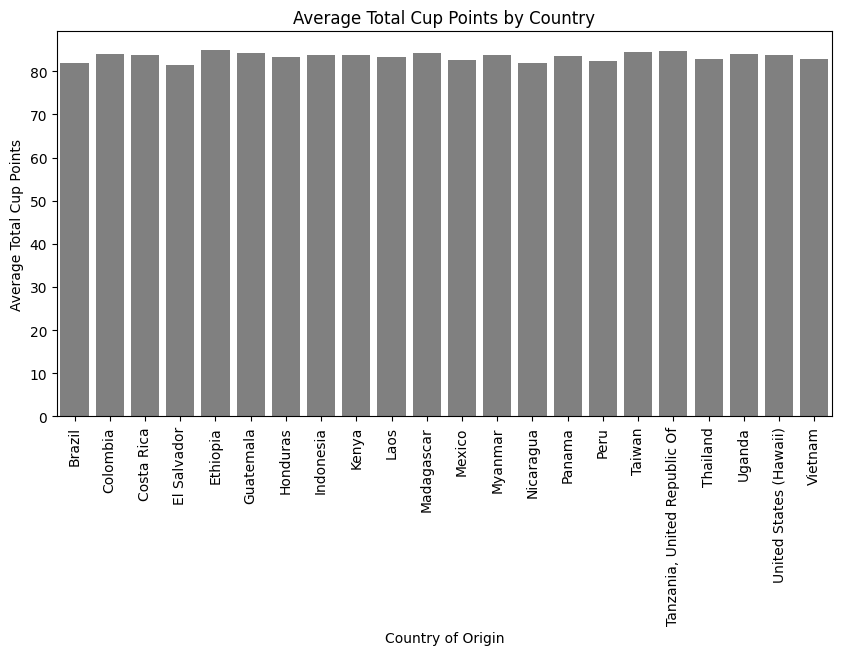

In [19]:
# Group the data by country and calculate the mean of Total Cup Points
df_grouped = df.groupby('Country of Origin')['Total Cup Points'].mean().reset_index()

# Create a Choropleth map
fig = px.choropleth(df_grouped, 
                    locations='Country of Origin', 
                    locationmode='country names',
                    color='Total Cup Points',
                    hover_name='Country of Origin',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Average Total Cup Points by Country')

fig.show()

# Create a bar plot with gray color
plt.figure(figsize=(10, 5))
sns.barplot(x=df_grouped['Country of Origin'], y=df_grouped['Total Cup Points'], color='gray')
plt.title('Average Total Cup Points by Country')
plt.xlabel('Country of Origin')
plt.ylabel('Average Total Cup Points')
plt.xticks(rotation=90)
plt.show()

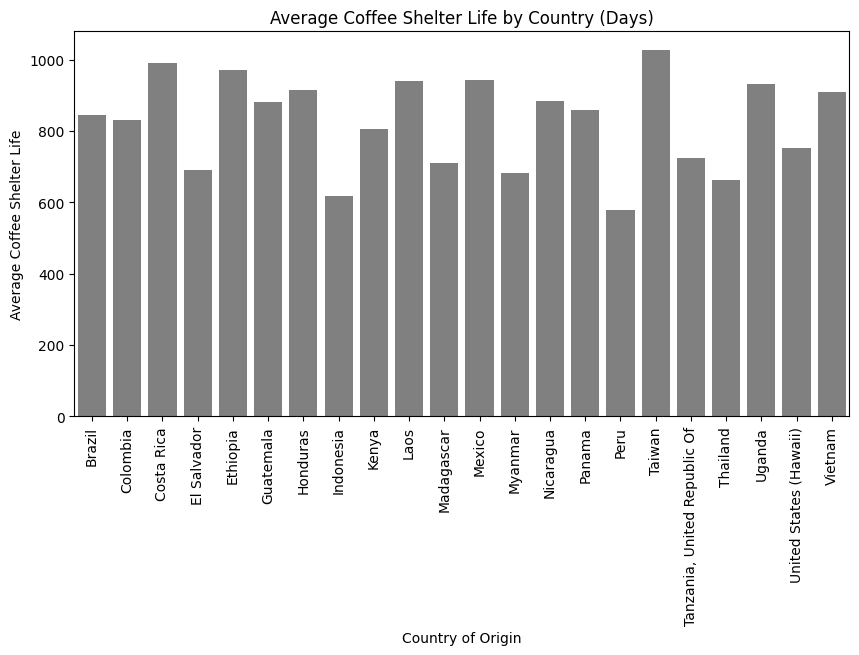

In [20]:
# Group the data by country and calculate the mean of Total Cup Points
df_grouped = df.groupby('Country of Origin')['Coffee Age'].mean().reset_index()

# Create a Choropleth map
fig = px.choropleth(df_grouped, 
                    locations='Country of Origin', 
                    locationmode='country names',
                    color='Coffee Age',
                    hover_name='Country of Origin',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Average Coffee Shelter Life by Country (Days)')

fig.show()

# Create a bar plot with gray color
plt.figure(figsize=(10, 5))
sns.barplot(x=df_grouped['Country of Origin'], y=df_grouped['Coffee Age'], color='gray')
plt.title('Average Coffee Shelter Life by Country (Days)')
plt.xlabel('Country of Origin')
plt.ylabel('Average Coffee Shelter Life')
plt.xticks(rotation=90)
plt.show()

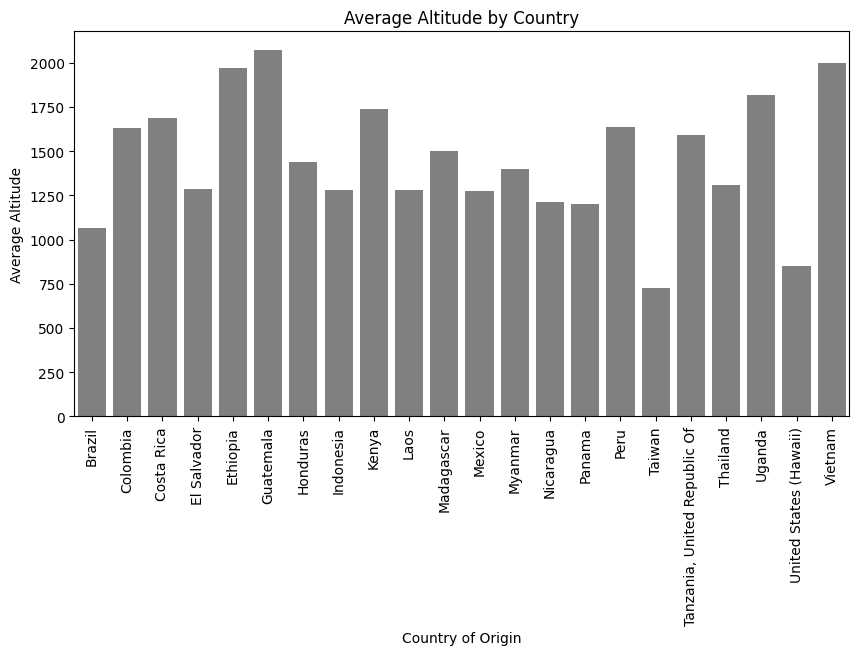

In [21]:
# Group the data by country and calculate the mean of Altitude
df_grouped = df.groupby('Country of Origin')['Altitude'].mean().reset_index()

# Create a Choropleth map
fig = px.choropleth(df_grouped, 
                    locations='Country of Origin', 
                    locationmode='country names',
                    color='Altitude',
                    hover_name='Country of Origin',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Average Altitude by Country')

fig.show()

# Create a bar plot with gray color
plt.figure(figsize=(10, 5))
sns.barplot(x=df_grouped['Country of Origin'], y=df_grouped['Altitude'], color='gray')
plt.title('Average Altitude by Country')
plt.xlabel('Country of Origin')
plt.ylabel('Average Altitude')
plt.xticks(rotation=90)
plt.show()


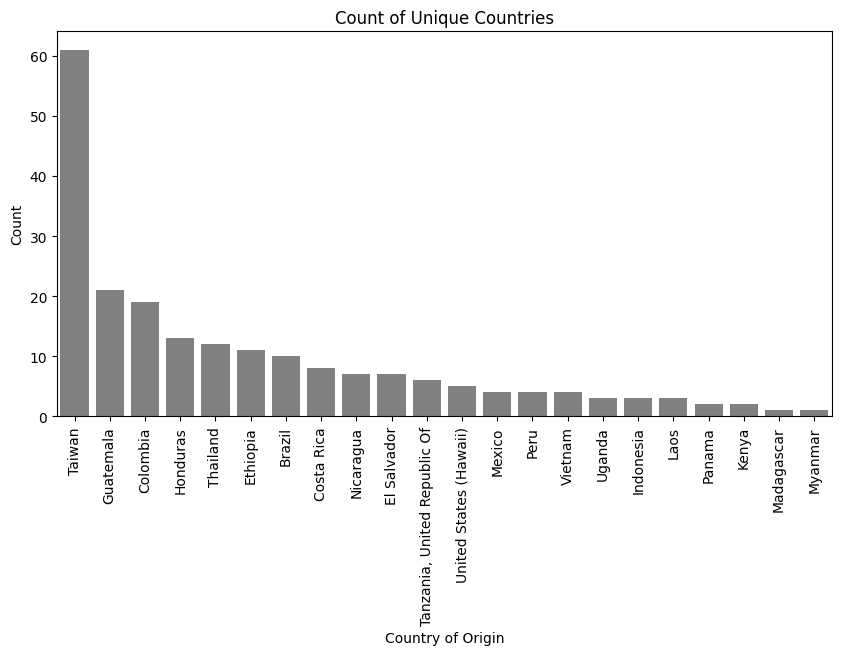

In [22]:
# Count the unique occurrences of each country
df_count = df['Country of Origin'].value_counts().reset_index()
df_count.columns = ['Country of Origin', 'Count']

# Create a choropleth map
fig = px.choropleth(df_count, 
                    locations='Country of Origin', 
                    locationmode='country names',
                    color='Count',
                    hover_name='Country of Origin',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Count of Unique Countries')

fig.show()

# Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=df_count['Country of Origin'], y=df_count['Count'], color='gray')
plt.title('Count of Unique Countries')
plt.xlabel('Country of Origin')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# CORRELATION 

## Dealing with categorical and numerical column
    
### Select Columns

In [23]:
data = df.copy()
categorical_columns = ['Processing Method']
numerical_columns = ['Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall', 'Total Cup Points', 'Moisture Percentage', 'Category One Defects', 'Quakers', 'Category Two Defects', 'Coffee Age']
columns_to_drop = ['Country of Origin', 'Color']
data.drop(columns_to_drop, axis=1, inplace=True)
dummy_variables = pd.get_dummies(data, columns=categorical_columns, drop_first=False)

### Preprocessing and Scaling the data

In [24]:
scaler = StandardScaler()

# Scale the numerical columns
scaled_numerical = scaler.fit_transform(data[numerical_columns])

# Convert the scaled numerical columns
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

##  2.Dealing with categorical variables

### Create Dummy Variables

In [25]:
# Drop the original numerical columns
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

# Concatenate the dummy variables and scaled numerical columns
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)

###  Corelation Matrix with dummy variables

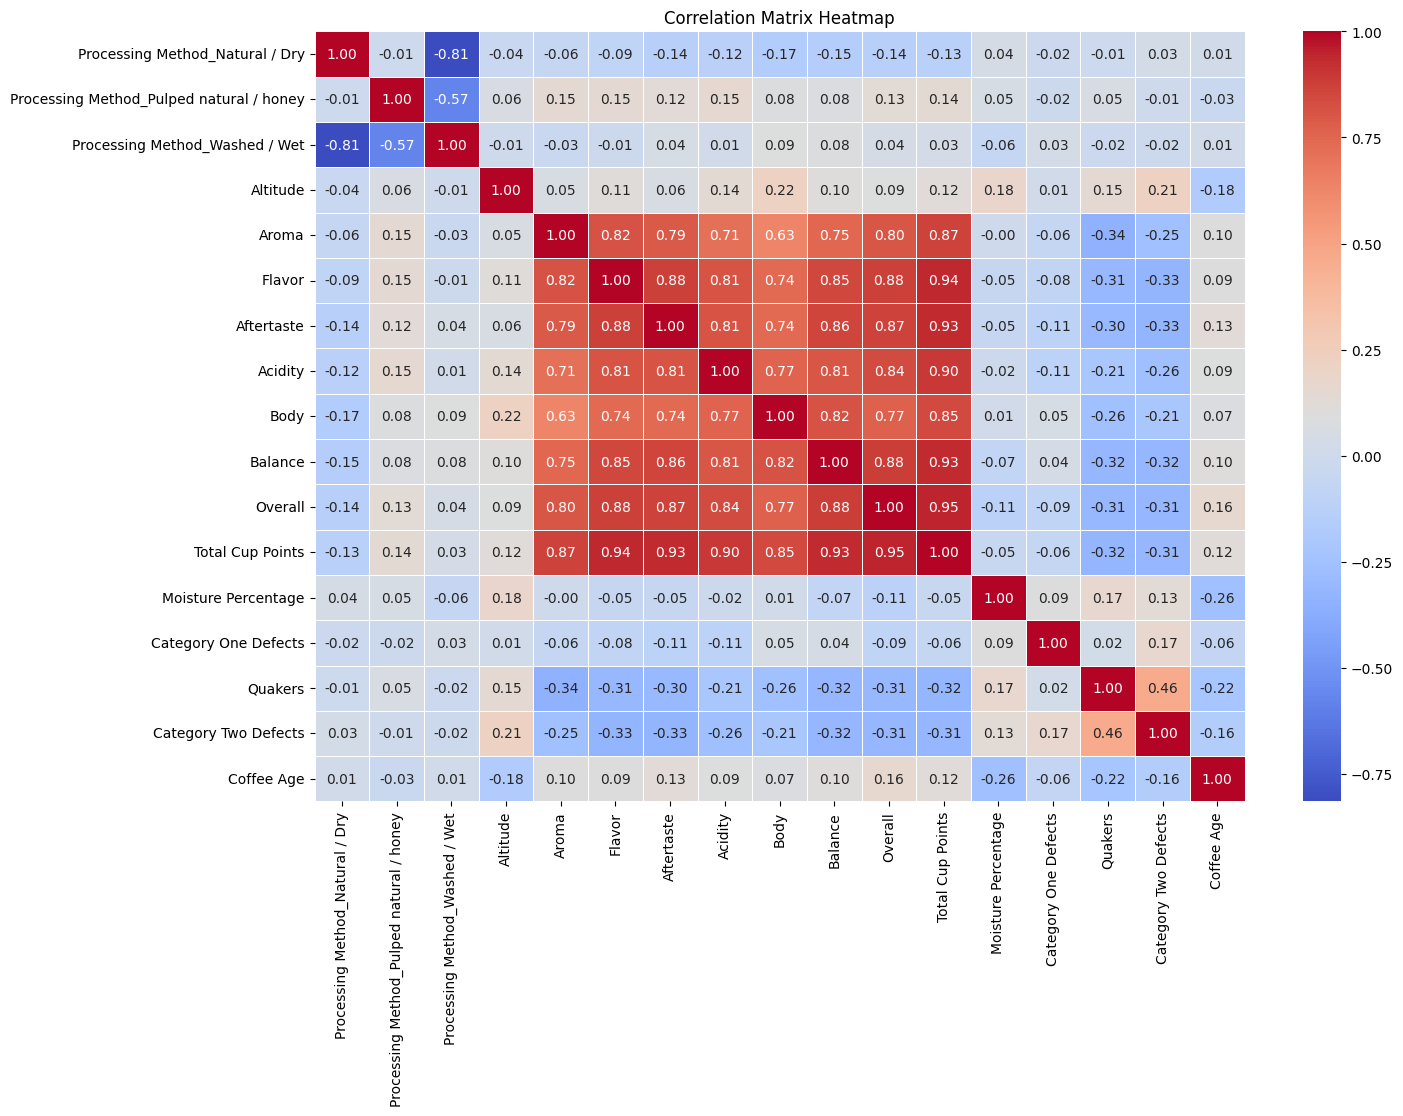

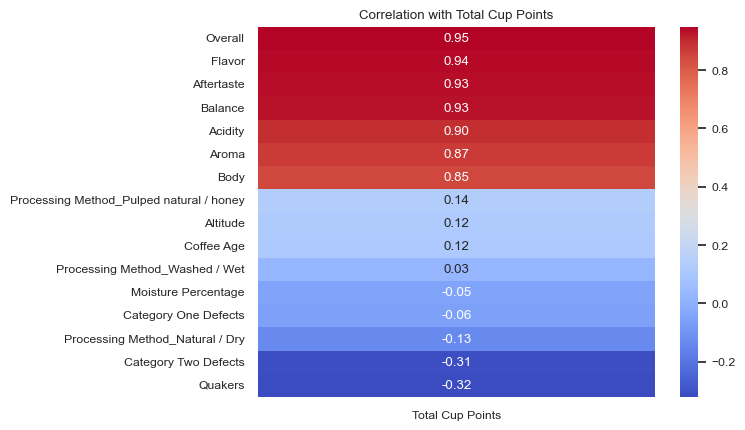

In [26]:
correlation_matrix = processed_df.corr()

#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

corr = processed_df.corr()
target_corr = corr['Total Cup Points'].drop('Total Cup Points')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

#Graph II
# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Total Cup Points')
plt.show()

**Intepret the Result:**

1. Overall, `Flavor`, `Aftertaste`, `Balance`, `Acidity`, `Aroma`, `Body`: These variables have strong positive correlations with 'Total Cup Points'. This means that as these variables increase, the 'Total Cup Points' also tend to increase. For example, a higher `'Overall'` rating or 'Flavor' rating is associated with a higher 'Total Cup Points' score.

2. `Processing Method_Pulped natural / honey, Altitude, Coffee Age, Processing Method_Washed / Wet`: These variables have weak positive correlations with 'Total Cup Points'. This suggests that these variables might have a slight positive effect on 'Total Cup Points', but the relationship is not as strong as the previous variables.

3. `Moisture Percentage`, `Category One Defects`: These variables have weak negative correlations with 'Total Cup Points'. This means that as these variables increase, the 'Total Cup Points' tend to decrease slightly. However, the correlation is weak, so these variables might not have a significant impact on 'Total Cup Points'.

4. `Processing Method_Natural / Dry`, `Category Two Defects`, `Quakers`: These variables have moderate negative correlations with 'Total Cup Points'. This suggests that as these variables increase, the 'Total Cup Points' tend to decrease. For example, a higher number of 'Category Two Defects' or 'Quakers' is associated with a lower 'Total Cup Points' score.


#  PREDICTIVE ANALYSIS

##  Clustering Analysis 

The preprocessing step involved encoding of categorical variables and MinMax scaling for numerical variables:

#### 
 Label encoding was applied to the categorical features. The categories of each feature were assigned a unique numerical label.

#### 
 MinMax scaling was applied to the numerical features. This scaling method transforms the data to fit within a specific range, typically (0, 1). In this case, numerical_features were scaled.

In [27]:
# Create a copy of the dataframe to not alter the original
df_preprocessed = df.copy()

# Preprocessing: Label encoding for categorical variables
le = LabelEncoder()
categorical_features = ['Country of Origin', 'Processing Method', 'Color']
for feature in categorical_features:
    df_preprocessed[feature] = le.fit_transform(df[feature])

# Preprocessing: MinMax scaling for numerical/ratio variables
mm = MinMaxScaler()
numerical_features = ['Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall', 'Total Cup Points', 'Moisture Percentage', 'Category One Defects', 'Quakers', 'Category Two Defects', 'Coffee Age']
for feature in numerical_features:
    df_preprocessed[feature] = mm.fit_transform(df[feature].values.reshape(-1,1))
    
# Apply t-SNE with different perplexity and learning rate
tsne = TSNE(n_components=2, random_state=42, perplexity=50, learning_rate=200)
tsne_results = tsne.fit_transform(df_preprocessed)

# Plotly Interactive plot
df_tsne = pd.DataFrame(data = tsne_results, columns = ['Dim_1', 'Dim_2'])
df_tsne['Total Cup Points'] = df['Total Cup Points']
fig = px.scatter(df_tsne, x='Dim_1', y='Dim_2', color='Total Cup Points', title='t-SNE plot colored by Total Cup Points')
fig.show()    

From the plot, we can observe the following:

Clusters: The points on the plot seem to form clusters, which could suggest that there are groups of coffee samples with similar characteristics in your dataset.
Color Gradient: The color gradient, which represents the 'Total Cup Points', shows a clear pattern across the clusters. This suggests that the coffee quality varies within each cluster.
Outliers: There don't appear to be any clear outliers in the plot, suggesting that most of the coffee samples have similar characteristics.

## SCORE PREDICTION

In [28]:
df.head()

,Country of Origin,Altitude,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Coffee Age
0,Colombia,1815.0,Washed / Wet,8.58,8.50,8.42,8.58,8.25,8.42,8.58,89.33,11.8,0,0,green,3,993
1,Taiwan,1200.0,Washed / Wet,8.50,8.50,7.92,8.00,7.92,8.25,8.50,87.58,10.5,0,0,blue-green,0,1048
2,Laos,1300.0,Washed / Wet,8.33,8.42,8.08,8.17,7.92,8.17,8.33,87.42,10.4,0,0,yellowish,2,1048
3,Costa Rica,1900.0,Washed / Wet,8.08,8.17,8.17,8.25,8.17,8.08,8.25,87.17,11.8,0,0,green,0,628
4,Colombia,1975.0,Pulped natural / honey,8.33,8.33,8.08,8.25,7.92,7.92,8.25,87.08,11.6,0,2,yellow-green,2,794


In [29]:
categorical_columns = ['Processing Method','Country of Origin', 'Color']
numerical_columns = ['Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall', 'Total Cup Points', 'Moisture Percentage', 'Category One Defects', 'Quakers', 'Category Two Defects', 'Coffee Age']

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), [col for col in numerical_columns if col != 'Total Cup Points']),
        ('cat', OneHotEncoder(), categorical_columns)])

# Append classifier to preprocessing pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestRegressor(n_estimators=100, random_state=42))])

# Split the data into train and test sets
X = df.drop('Total Cup Points', axis=1)
y = df['Total Cup Points']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.12949020428571217


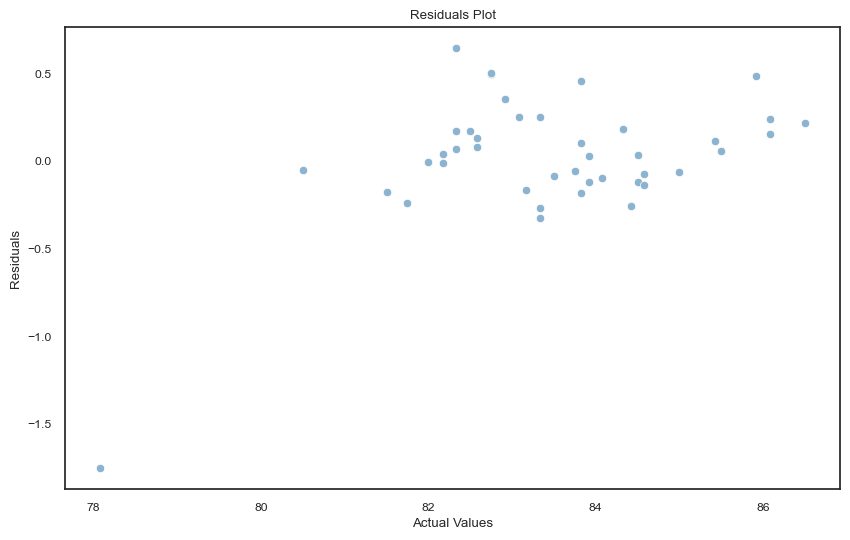

In [31]:
# Plot residuals
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=residuals)
plt.title('Residuals Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

In this type of plot, we can visualize the discrepancy between the actual values and the predicted values in a regression model.

Let's break down the plot:

- On the x-axis, we have the actual values of the variable called 'Total Cup Points'.
- The y-axis represents the residuals, which are calculated as the differences between the actual values and the predicted values of 'Total Cup Points'.

Ideally, in a perfect model, all the points would align along the horizontal line at y=0. This line represents the instances where the predicted value matches exactly with the actual value.

When examining the plot, we observe that the residuals are spread around the y=0 line, which is a positive indication. This implies that the model's errors appear to be randomly scattered without any discernible pattern.

Nevertheless, there are certain points that deviate from the y=0 line, indicating areas where the model's predictions were inaccurate.

Keep in mind that the proximity of the points to the y=0 line is an indicator of prediction quality. Points that are far from the line indicate predictions that significantly differ from the actual values.

Additionally, the density of points can provide insights into the distribution of errors. If you notice a high density of points far from the y=0 line, it might suggest systematic errors present in the model.

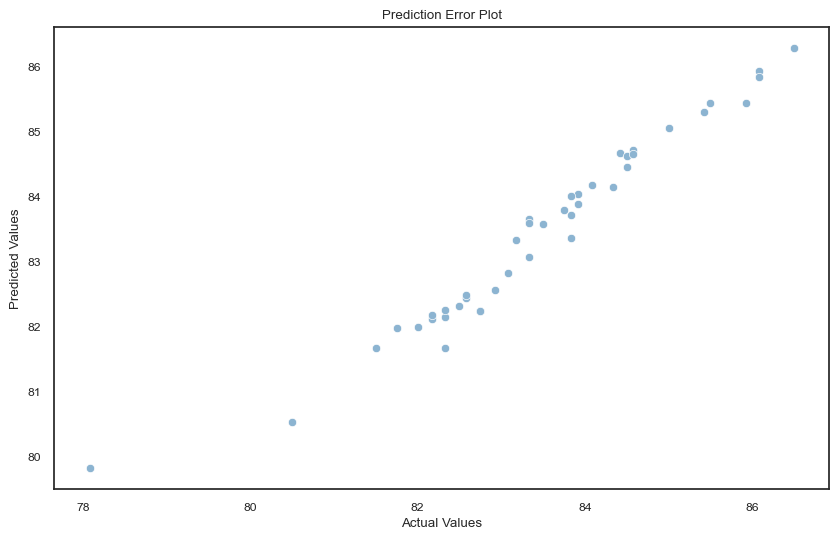

In [32]:
# Plot prediction error
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Prediction Error Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In this type of plot, we can examine the disparities between the actual values and the predicted values in a regression model. It's commonly known as the Prediction Error Plot.

Let's break down the plot:

- The x-axis represents the actual values of the variable called 'Total Cup Points'.
- On the y-axis, we have the predicted values of 'Total Cup Points'.

In an ideal scenario with perfect predictions, all the points would align along the diagonal line. This line represents instances where the predicted value matches exactly with the actual value.

When analyzing the plot, we can observe that most of the points are relatively close to the diagonal line, indicating reasonably accurate predictions by the model. However, there are certain points that deviate from the line, highlighting areas where the model's predictions were inaccurate.

Remember, the proximity of the points to the diagonal line indicates the quality of predictions. Points that are far from the line suggest predictions that significantly differ from the actual values.

Additionally, the density of points can provide insights into the distribution of errors. If you notice a high density of points far from the diagonal line, it could indicate systematic errors present in the model.

In summary, this plot offers a visual means to assess the performance of a regression model. It serves as a valuable tool for understanding the areas where the model makes errors and the magnitude of those errors.

